Diwali-Sales-Analysis

In [3]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  #visualizing data
%matplotlib inline
import seaborn as sns 

In [4]:
a=pd.read_csv('/kaggle/input/diwali-sales-analysis/Diwali Sales Data.csv',encoding='unicode_escape')
a.head() #we used to avoid encoding error bec sometimes when we load our data get shows error if we pass it we won't get any error(this is optional,if u get error u can pass 'unicode_escape')

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
a.shape  #11251 rows,15 columns

(11251, 15)

In [6]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
#drop unrelated/blank column
a.drop(['Status','unnamed1'],axis=1,inplace=True)
a.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [8]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
a.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
a.shape

(11251, 13)

In [14]:
#drop null values
a.dropna(inplace=True)

In [16]:
a.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [15]:
a.shape

(11239, 13)

In [17]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [19]:
#changing data type of amount column to  int
a['Amount'] = a['Amount'].astype('int')
a['Amount'].dtypes

dtype('int64')

In [21]:
a.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
#we can also rename column
#Eg: df.rename(column={'Martial_Status':'Shaadi'}) #inside dict we are passing{}

In [23]:
a.describe() #returns description of the data in the dataframe(i.e, count,mean etc)

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [24]:
#can use describe() for specific columns
a[['Age','Orders','Amount']].describe()

#say u want to see what is min amount of a product which you are selling u get it 188 etc

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


**Exploratory Data Analysis**

In [25]:
a.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**Who buys more product based on gender**

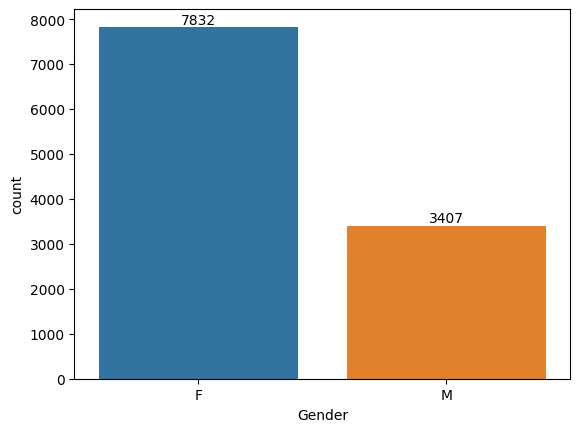

In [27]:
ax =  sns.countplot(x = 'Gender',data = a)

for bars in ax.containers:
    ax.bar_label(bars) #to get values @ top of the bars

**From the above graph we can see that most of the buyers are Female & even the purchasing power(order) of females are greater than men**

In [28]:
a.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

#we are grouping by gender & making sum of amount & sorting it in desc order

,Gender,Amount
0,F,74335853
1,M,31913276


**Let's check this by plotting graph**

<Axes: xlabel='Gender', ylabel='Amount'>

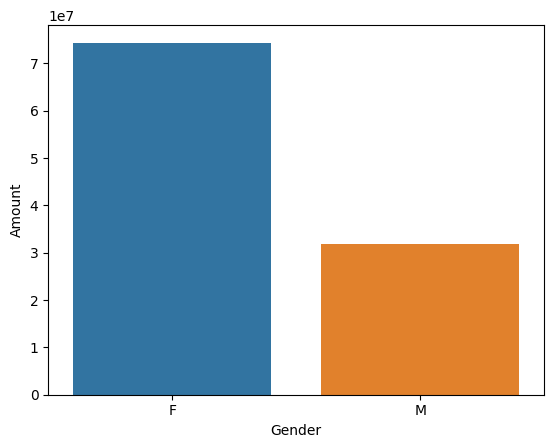

In [29]:
sales_gender = a.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

sns.barplot(x = 'Gender',y = 'Amount',data = sales_gender)

**This is also same graph as before just wanted to see who did more shopping M/F? FEmale spent more money than men**

**Age**

In [32]:
a.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

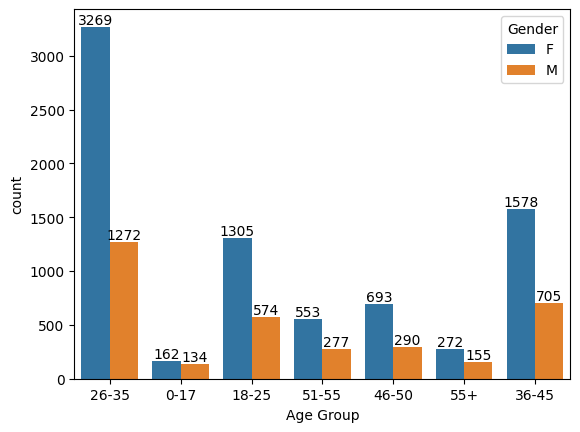

In [33]:
ax =  sns.countplot(x = 'Age Group',data = a,hue = 'Gender')  #with hue we divide based on gender & created pairplots(if u don't pass hue u can see it won't different is it M/F buyer)

for bars in ax.containers:
    ax.bar_label(bars)

**We can say that Female are the one which have buyed more products than men & they fall in age group of 26-35**

<Axes: xlabel='Age Group', ylabel='Amount'>

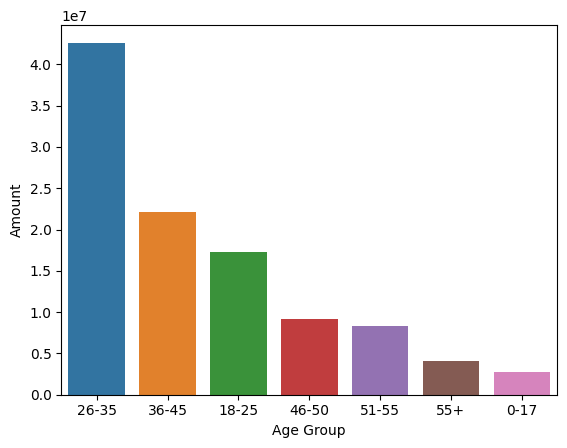

In [35]:
#total amount vs age group
Sales_age =  a.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

sns.barplot(x = 'Age Group',y = 'Amount',data = Sales_age)

**same graph as above we can see that most of the buyers are of age group b/w 26-35 years**

**State**

<Axes: xlabel='State', ylabel='Orders'>

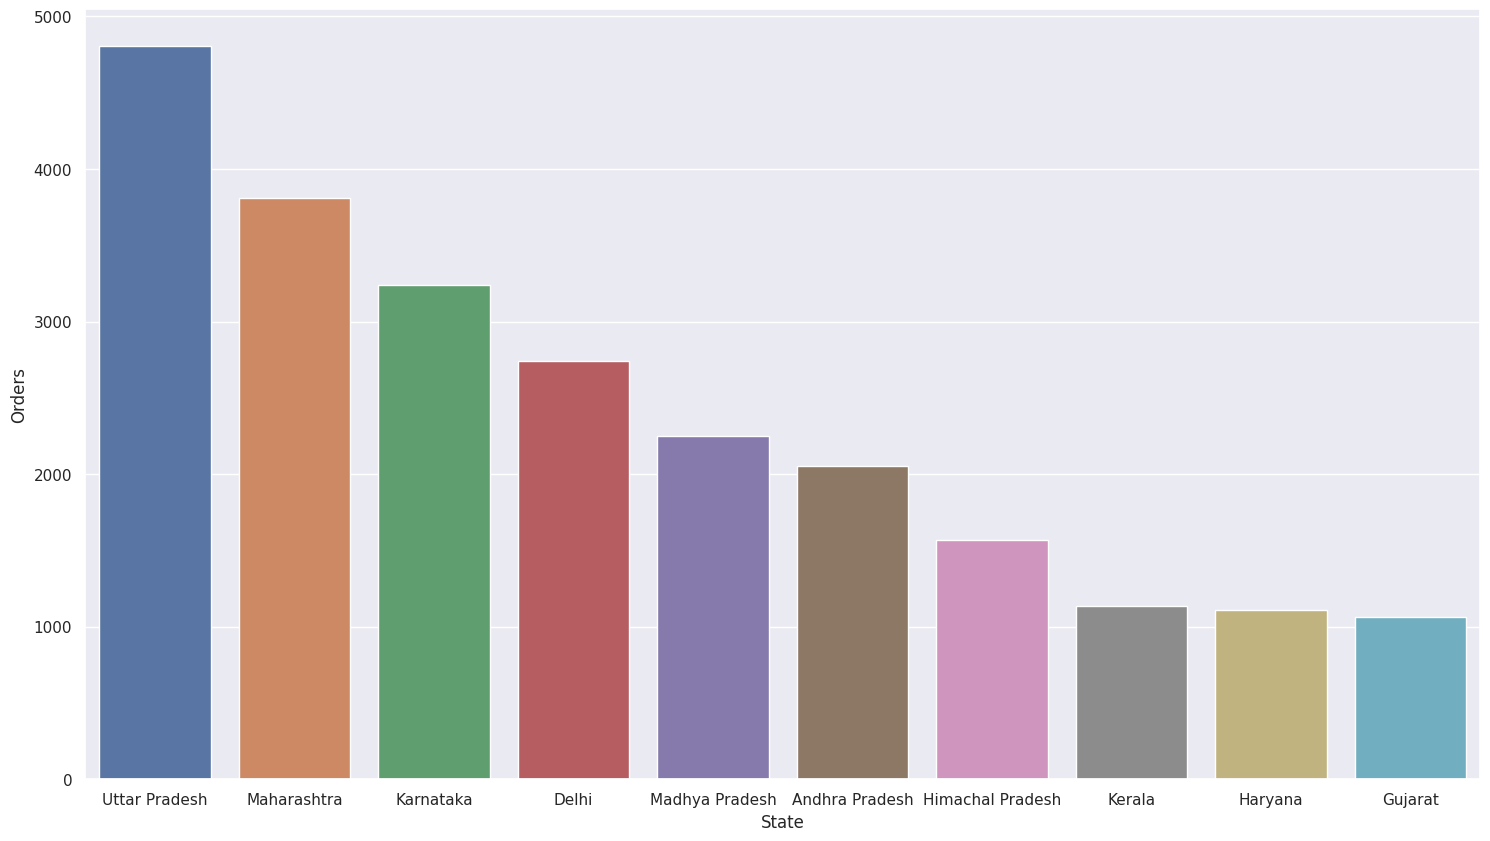

In [46]:
#total number of orders from top 10 states

sales_state =  a.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,10)}) #to avoid overlapping gave this u can remove & check
sns.barplot(data=sales_state,x='State',y='Orders')

**From above graph we can say that most of the orders are from uttar pradesh,maharashtra & karnataka respectively**

<Axes: xlabel='State', ylabel='Amount'>

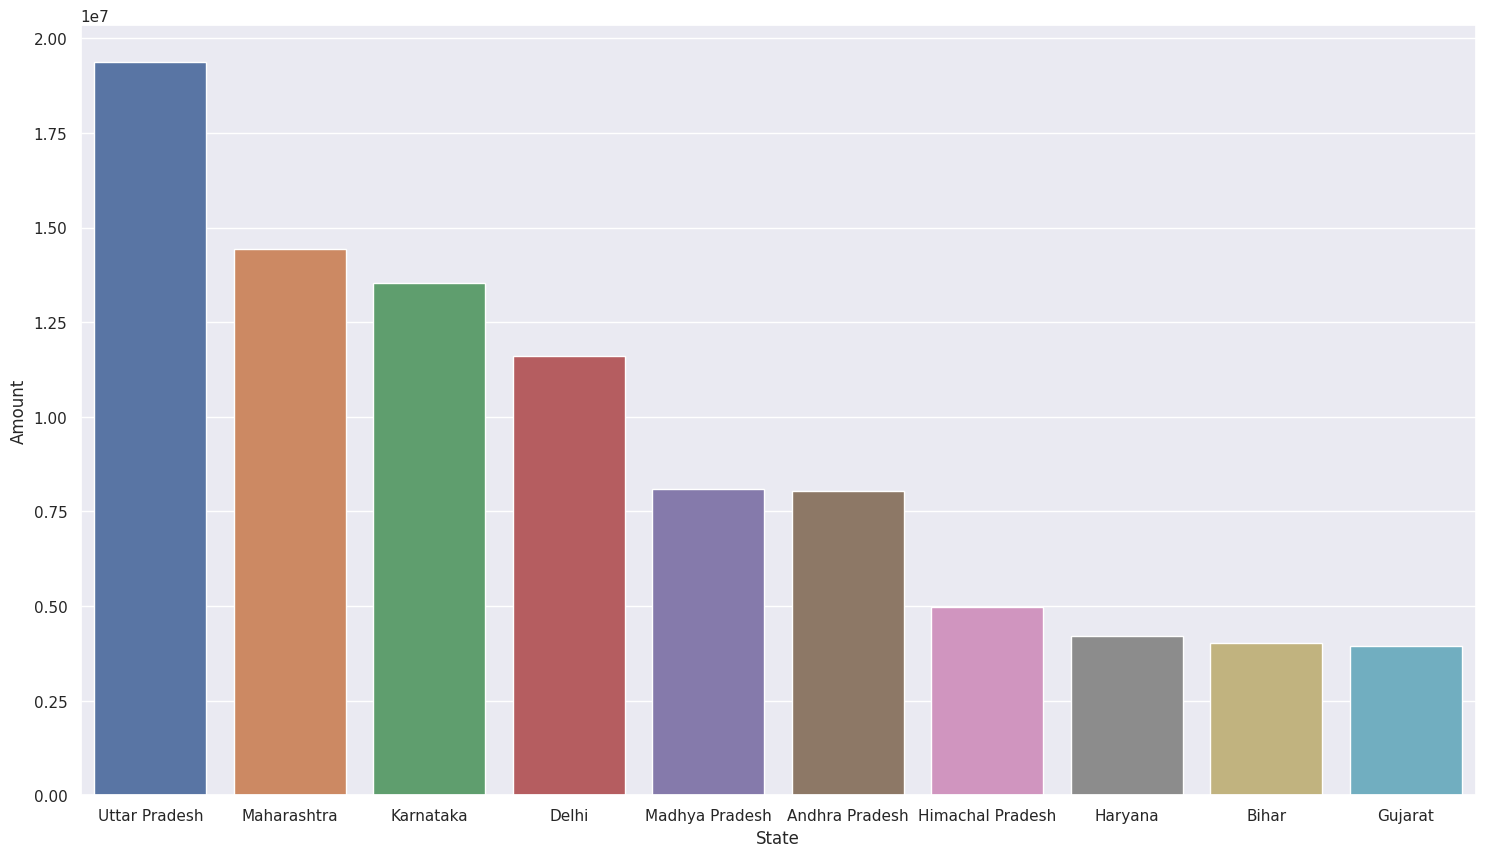

In [49]:
#total amount/sales from top 10 states
sales_state =  a.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,10)}) #to avoid overlapping gave this u can remove & check
sns.barplot(data=sales_state,x='State',y='Amount')

**we can say that most of the orders & total sales/amount are from up,maharashtra & karnataka(based on amount we are seeing states)**

#u can see that in above we had kerala at 8th position by here it's haryana based on amount

**Martial Status**

In [52]:
a.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

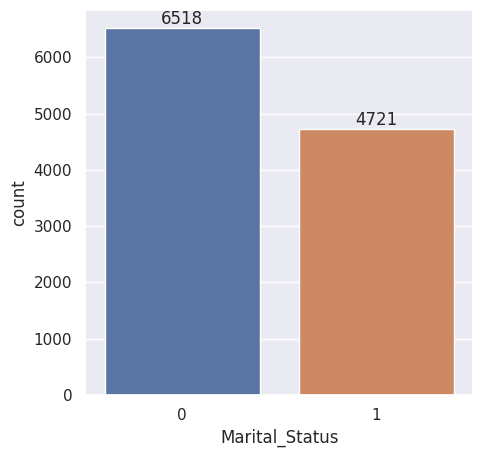

In [58]:
ax =  sns.countplot(x = 'Marital_Status',data = a)

sns.set(rc={'figure.figsize':(6,5)})
for bars in ax.containers:
    ax.bar_label(bars)  #0-false(not married),1-true(if married yes)

**We can say that not married people are the one who buy more than compared to married**

<Axes: xlabel='Marital_Status', ylabel='Amount'>

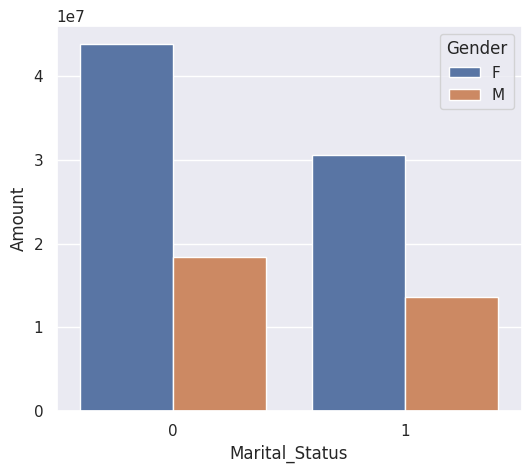

In [62]:
sales_status =  a.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')

**we can say that most of the buyers are unmarried females who buys more than men & they have high purchasing power**
0 - not married
1 - married 
is the most obvious assumption that can be made as 0 stands for false so it can't be married.

**Occupation**

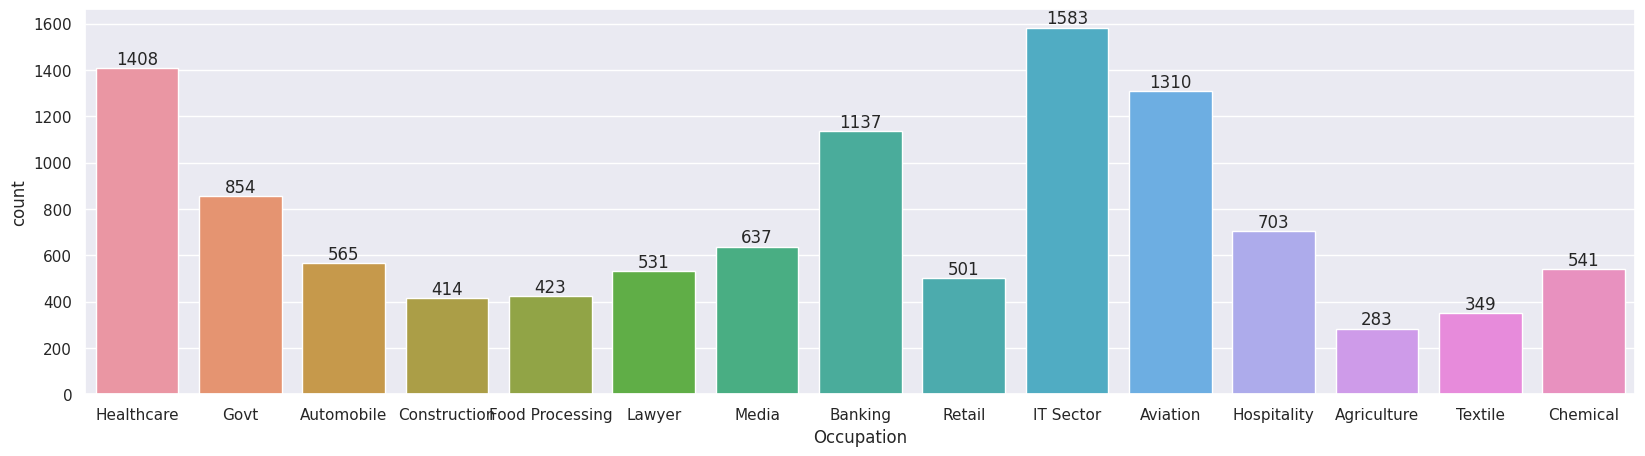

In [69]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = a,x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

**we can see that the one who ordered the most belongs to IT sector,then healthcare,aviation**

<Axes: xlabel='Occupation', ylabel='Amount'>

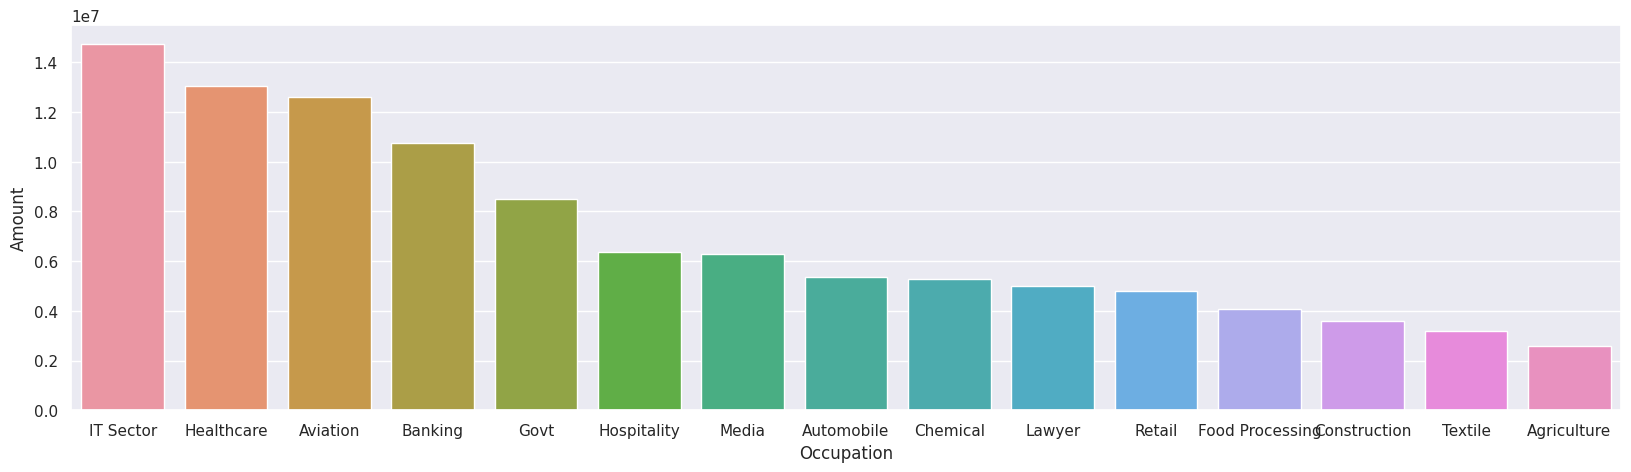

In [76]:
sales_status =  a.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_status,x='Occupation',y='Amount')

**same as above we just grouped it & are seeing based on amount so most of the buyers are working in It,healtcare,avaiation sector**

**Product Category**

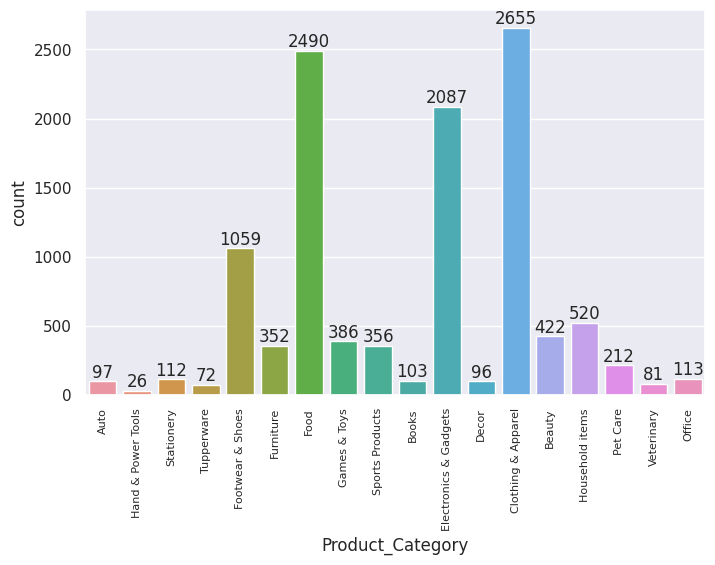

In [80]:
sns.set(rc={'figure.figsize':(8,5)})
plt.xticks(rotation='vertical',fontsize=8)
ax = sns.countplot(data = a,x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

**The product which got selled the most is clothing & apparel then food,& then electronics & gadgets**

<Axes: xlabel='Product_Category', ylabel='Amount'>

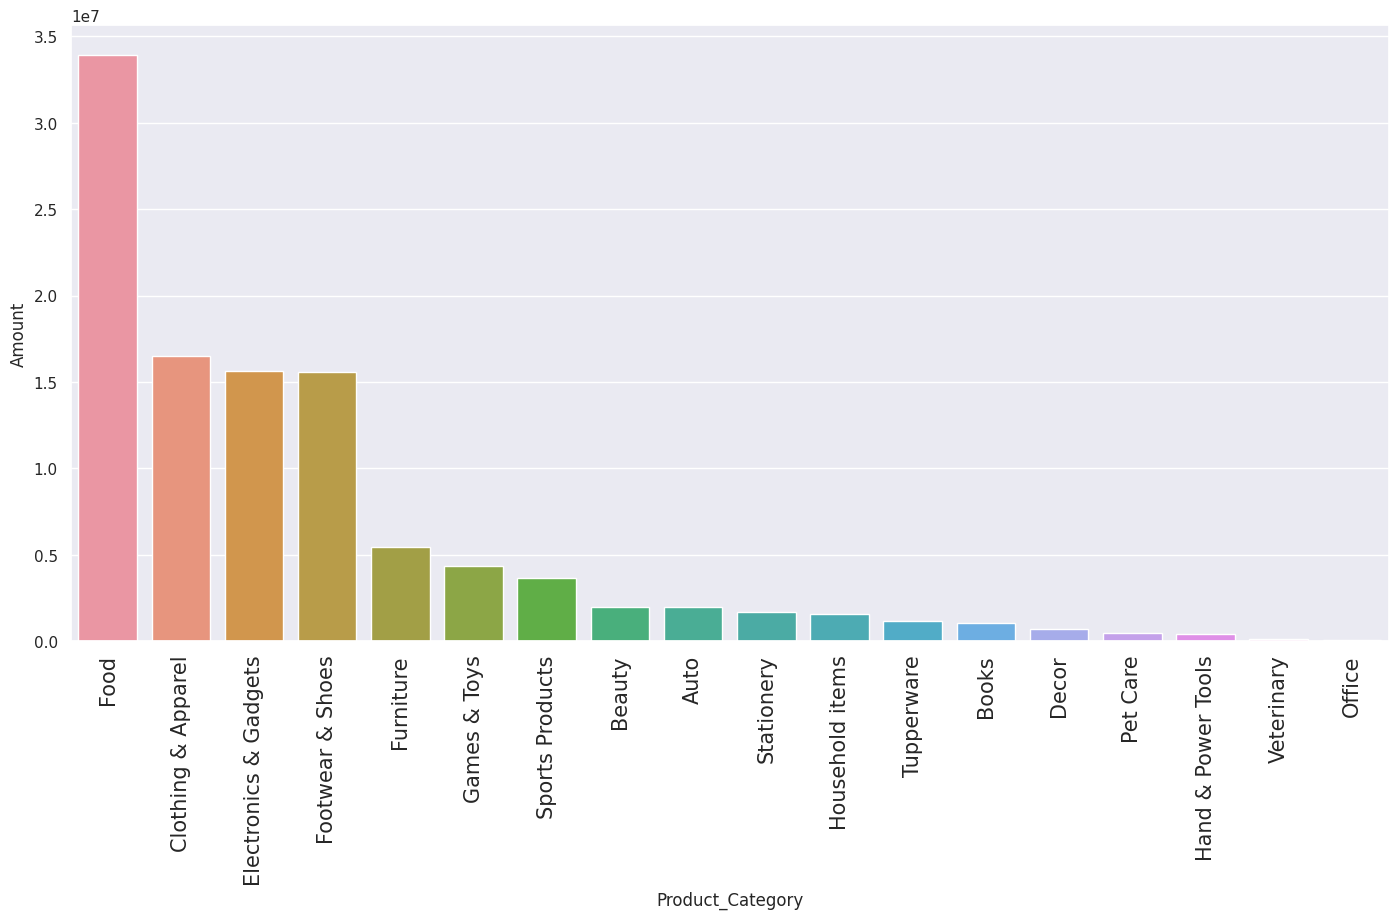

In [89]:
sales_status =  a.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.xticks(rotation='vertical',fontsize=15)
sns.set(rc={'figure.figsize':(17,8)})
sns.barplot(data=sales_status,x='Product_Category',y='Amount') #lw7 is nothing but 0.0*10^(power)7 which is huge amount

so the product selled most amount wise is food

<Axes: xlabel='Product_ID', ylabel='Orders'>

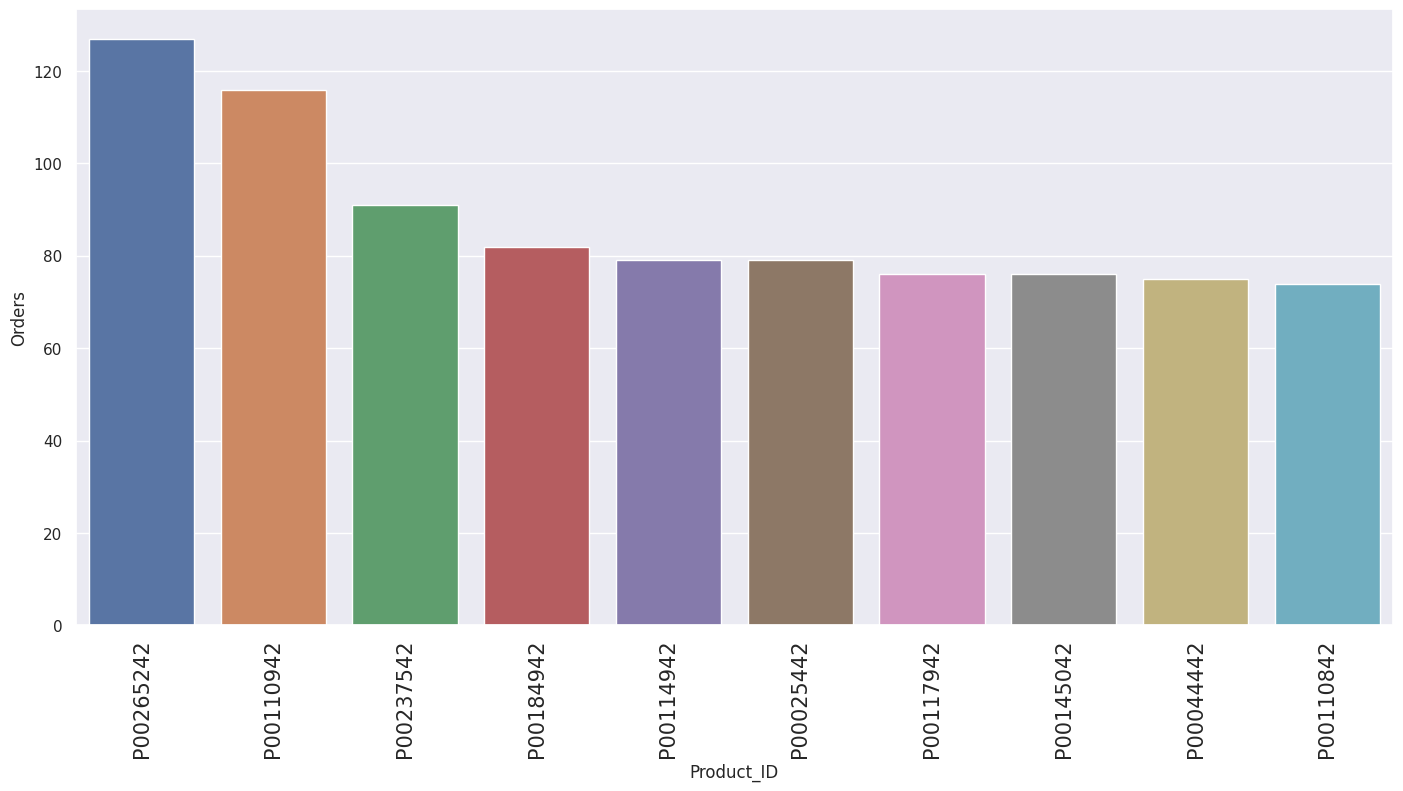

In [91]:
sales_status =  a.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.xticks(rotation='vertical',fontsize=15)
sns.set(rc={'figure.figsize':(17,8)})
sns.barplot(data=sales_status,x='Product_ID',y='Orders')

**this gives the prod id of the prod which got solded the most**

<Axes: xlabel='Product_ID'>

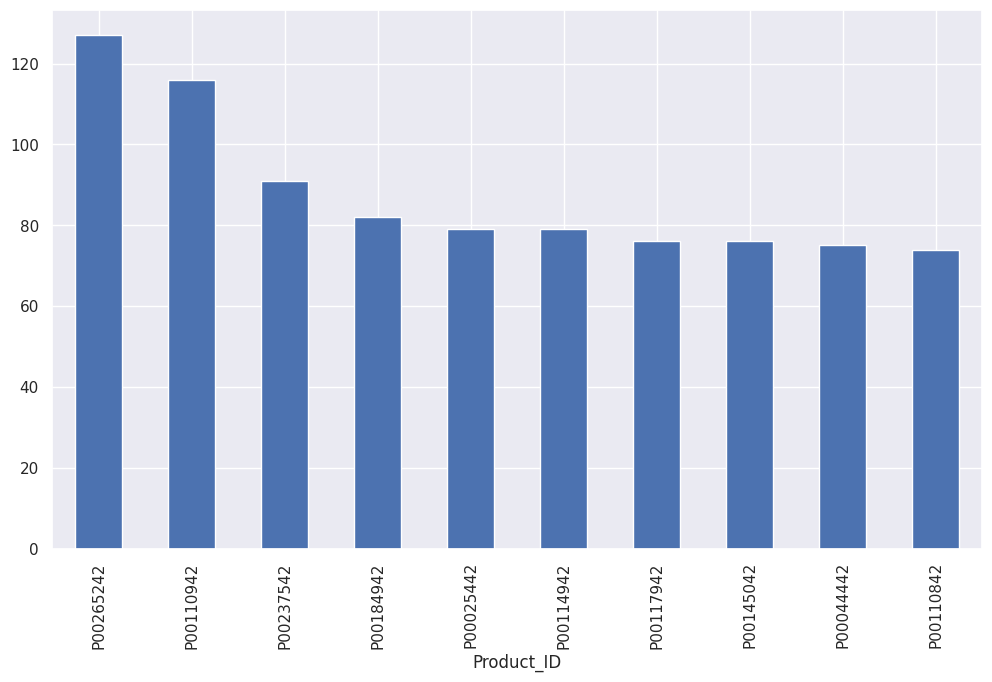

In [92]:
#top 10 most sold product(same thing as above)
fig1,ax1=plt.subplots(figsize=(12,7))
a.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

**Conclusion :**

**Unmarried women of age group 26-35 years from UP,Maharastra & Karnataka working in IT,Healthcare and Aviation are most likely to buy products from food,clothing and electronic category**